In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [48]:
plt.style.use('bmh')

# Data examples

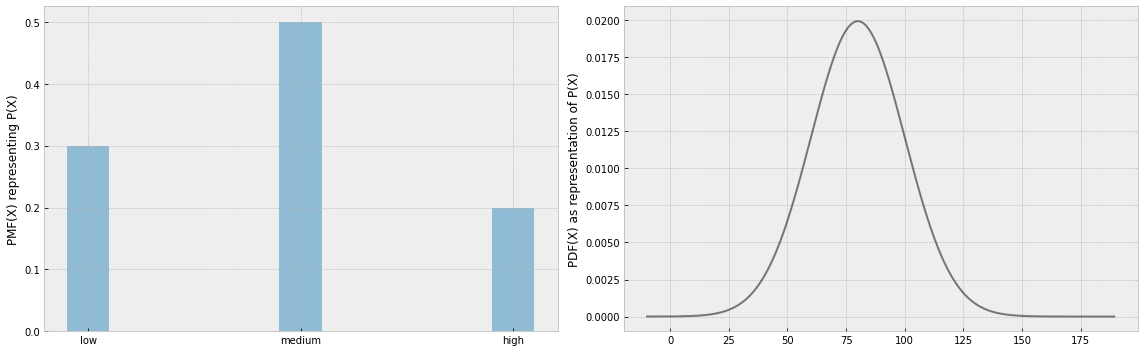

In [49]:
# cont categorical dist
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
plt.style.use('bmh')

#cat data
ref = np.array([0.3, 0.5, 0.2])
ana = np.array([0.1, 0.7, 0.2])
concept= np.array([0.3, 0.1, 0.05])


income = ['low', 'medium', 'high']
x_axis = np.arange(len(income))
axs[0].bar(x_axis, ref, width=0.2, label='P(X) Reference data', alpha=0.5);
axs[0].set_xticks(x_axis, income)
axs[0].set_ylabel('PMF(X) representing P(X)')

#cont data
size = 100_000
mean_start = 80
shift = 20
ref = np.random.normal(mean_start, 20, size)
ana = np.random.normal(mean_start+shift, 20, size)
mean_start = 80
xs = np.linspace(np.min(ref), np.max(ana), 10_000)
pdf_ref = stats.norm(mean_start, 20).pdf(xs)


axs[1].plot(xs, pdf_ref, color='black', alpha=0.5);
axs[1].set_ylabel('PDF(X) as representation of P(X)')

plt.tight_layout()
plt.savefig("cont_categorical.svg", format='svg')

# Covariate shift example

## Categorical

In [50]:
# generate data
ref = np.array([0.3, 0.5, 0.2])
ana = np.array([0.1, 0.7, 0.2])
concept= np.array([0.3, 0.1, 0.05])

joint_ref = concept*ref
joint_ana = concept*ana

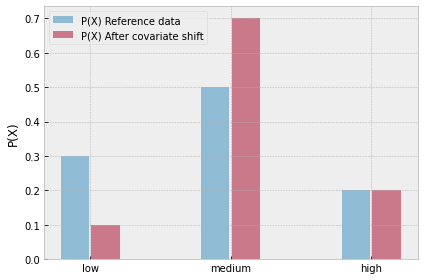

In [51]:

income = ['low', 'medium', 'high']
x_axis = np.arange(len(income))
plt.bar(x_axis - 0.11, ref, width=0.2, label='P(X) Reference data', alpha=0.5);
plt.bar(x_axis + 0.11, ana, width=0.2, label='P(X) After covariate shift',  alpha=0.5);
plt.xticks(x_axis, income)
plt.ylabel('P(X)')
plt.title("")
plt.tight_layout()
plt.legend()
plt.savefig('covariate_show.svg', format='svg')

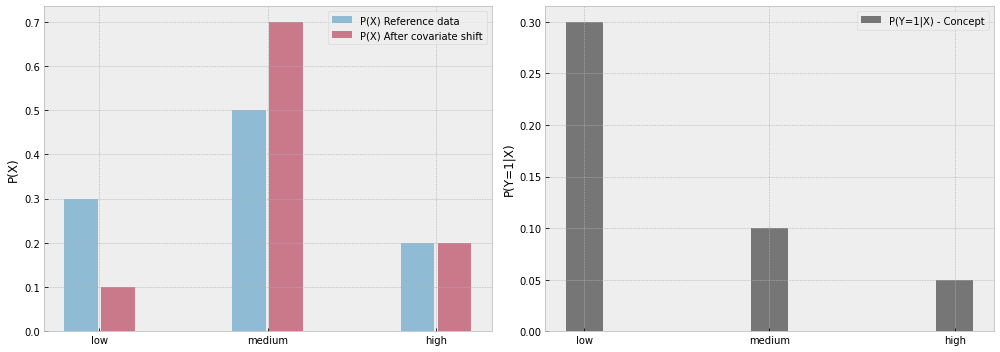

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

income = ['low', 'medium', 'high']
x_axis = np.arange(len(income))
axs[0].bar(x_axis - 0.11, ref, width=0.2, label='P(X) Reference data', alpha=0.5);
axs[0].bar(x_axis + 0.11, ana, width=0.2, label='P(X) After covariate shift',  alpha=0.5);
axs[0].set_xticks(x_axis, income)
axs[0].set_ylabel('P(X)')
axs[0].set_title("")
axs[0].legend()

axs[1].bar(x_axis, concept, width=0.2, label='P(Y=1|X) - Concept', color='black', alpha=0.5);
axs[1].set_xticks(x_axis, income)
axs[1].set_ylabel('P(Y=1|X)')
axs[1].legend()
plt.tight_layout()
plt.savefig("covariate_categorical_.svg", format='svg')

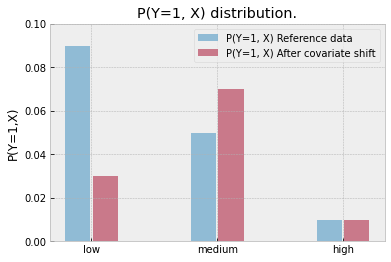

In [53]:

income = ['low', 'medium', 'high']
x_axis = np.arange(len(income))
plt.bar(x_axis - 0.11, joint_ref, width=0.2, label='P(Y=1, X) Reference data', alpha=.5);
plt.bar(x_axis + 0.11, joint_ana, width=0.2, label='P(Y=1, X) After covariate shift',  alpha=0.5);
plt.xticks(x_axis, income)
plt.ylabel('P(Y=1,X)')
plt.title("P(Y=1, X) distribution.")
plt.ylim(0, 0.10)
plt.legend()
plt.savefig("covariate_categorical_bef_after.svg", format='svg')

In [54]:
joint_ref = concept*ref
joint_ana = concept*ana

In [55]:
# absolute effect
np.sum(abs(joint_ana - joint_ref))

0.07999999999999999

In [56]:
# directional
np.sum((joint_ana - joint_ref))

-0.04000000000000001

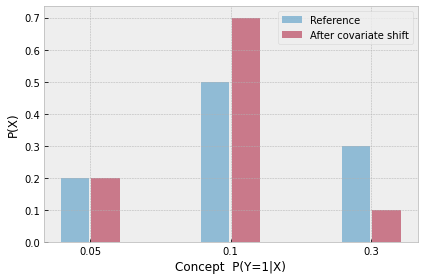

In [57]:
# effect on performance
flipped_concept = np.flip(concept)
flipped_ref = np.flip(ref)
flipped_ana = np.flip(ana)
x_axis = np.arange(len(flipped_concept))
plt.bar(x_axis - 0.11,  flipped_ref, width=0.2, label = 'Reference', alpha=0.5)
plt.bar(x_axis + 0.11,  flipped_ana, width=0.2, label = 'After covariate shift', alpha=0.5)
plt.xlabel('Concept  P(Y=1|X)')
plt.xticks(x_axis, flipped_concept)
plt.ylabel('P(X)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("covariate_shift_effect_on_performance.svg", format='svg')

### Continuous

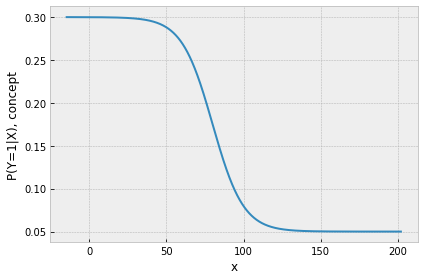

In [58]:
size = 100_0000
mean_start = 80
shift = 20
ref = np.random.normal(mean_start, 20, size)
ana = np.random.normal(mean_start+shift, 20, size)

def sigmoid(x):
    return 1 / (1 + np.exp((x-mean_start)/10))*0.25+0.05

xs = np.linspace(np.min(ref), np.max(ana), 10_000)
pdf_ref = stats.norm(mean_start, 20).pdf(xs)
pdf_ana = stats.norm(mean_start+shift, 20).pdf(xs)
concept = sigmoid(xs)
plt.plot(xs, concept)
plt.ylabel("P(Y=1|X), concept")
plt.xlabel("x")
plt.tight_layout()
plt.savefig('concept.svg', format='svg')

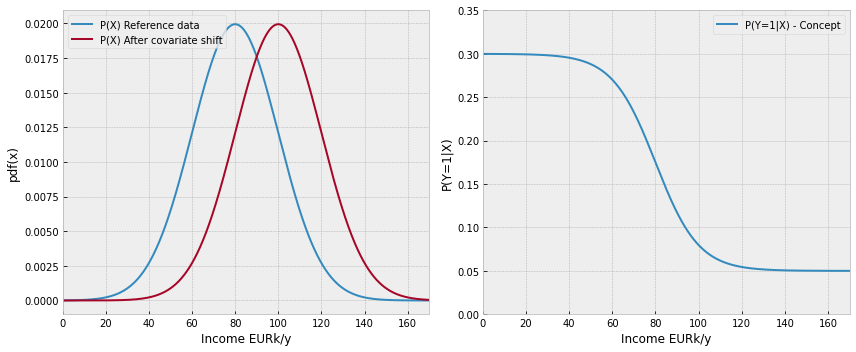

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))


axs[0].plot(xs, pdf_ref, label='P(X) Reference data')
axs[0].plot(xs, pdf_ana, label='P(X) After covariate shift')
axs[0].set_xlabel('Income EURk/y')
axs[0].set_ylabel('pdf(x)')
axs[0].legend()
axs[0].set_xlim(0, 170 )


axs[1].set_ylabel('P(Y=1|X)')
axs[1].set_xlabel('Income EURk/y')
axs[1].plot(xs, concept, label='P(Y=1|X) - Concept')
axs[1].set_ylim(0,0.35 )
axs[1].set_xlim(0, 170 )
axs[1].legend()
plt.tight_layout()
plt.savefig("covariate_cont_situation.svg", format='svg')

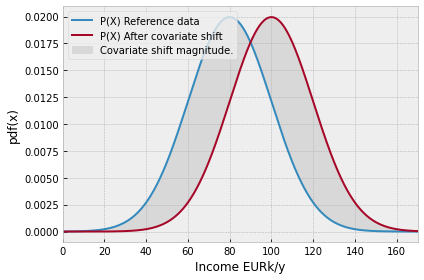

In [60]:
plt.plot(xs, pdf_ref, label='P(X) Reference data')
plt.plot(xs, pdf_ana, label='P(X) After covariate shift')
plt.xlabel('Income EURk/y')
plt.ylabel('pdf(x)')
plt.xlim(0, 170 )
plt.fill_between(xs, pdf_ref, pdf_ana, color='grey', alpha=0.2, label='Covariate shift magnitude.')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig("covariate_cont_fill.svg", format='svg')

In [61]:
covariate_magnitude_abs = abs(pdf_ana-pdf_ref)

In [62]:
covariate_magnitude_abs_integral = np.sum(covariate_magnitude_abs*(xs[1]-xs[0]))/2
covariate_magnitude_abs_integral

0.3829242400612684

In [63]:
proportion_below_90_ref = len(ref[ref<90])/len(ref)
proportion_below_90_ana = len(ana[ana<90])/len(ana)
change = abs(proportion_below_90_ana-proportion_below_90_ref)
change

0.383433

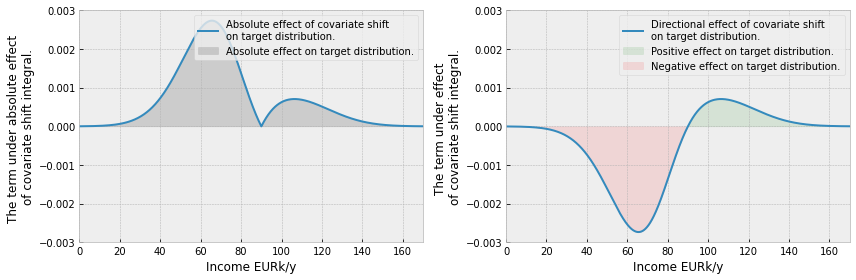

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
abs_covariate_effect = concept*abs(pdf_ana-pdf_ref)
covariate_effect = concept*(pdf_ana-pdf_ref)
axs[0].plot(xs, abs_covariate_effect, label= 'Absolute effect of covariate shift \non target distribution.')
axs[0].set_xlabel('Income EURk/y')
axs[0].fill_between(xs, 0, abs_covariate_effect, color='grey', alpha=0.3, label='Absolute effect on target distribution.')
axs[0].set_ylabel('The term under absolute effect \nof covariate shift integral.')
# axs[0].set_ylabel('pdf(x)')
axs[0].legend(loc='upper right')
axs[0].set_xlim(0, 170 )
axs[0].set_ylim(-0.003, 0.003 )

axs[1].plot(xs, covariate_effect, label = 'Directional effect of covariate shift \non target distribution.')
axs[1].set_xlabel('Income EURk/y')
axs[1].set_ylabel('The term under effect \nof covariate shift integral.')

axs[1].fill_between(xs[xs>90], 0, covariate_effect[xs>90], color='green', alpha=0.1, label='Positive effect on target distribution.')
axs[1].fill_between(xs[xs<90], 0, covariate_effect[xs<90], color='red',  alpha=0.1, label='Negative effect on target distribution.')
axs[1].set_xlim(0, 170 )
axs[1].set_ylim(-0.003, 0.003 )
axs[1].legend(loc='upper right')
plt.tight_layout()
plt.savefig("covariate_cont_change_per_x.svg", format='svg')

In [65]:
covariate_magnitude_abs = abs(pdf_ana-pdf_ref)
covariate_magnitude = pdf_ana-pdf_ref

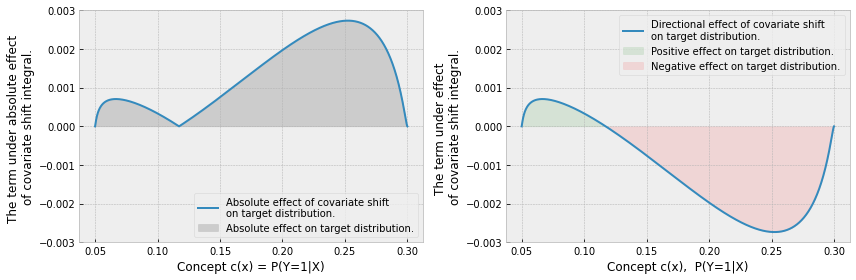

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
abs_covariate_effect = concept*abs(pdf_ana-pdf_ref)
covariate_effect = concept*(pdf_ana-pdf_ref)
axs[0].plot(concept, abs_covariate_effect, label= 'Absolute effect of covariate shift \non target distribution.')
axs[0].set_xlabel('Concept c(x) = P(Y=1|X)')
axs[0].set_ylabel('The term under absolute effect \nof covariate shift integral.')
# axs[0].set_ylabel('pdf(x)')
axs[0].fill_between(concept, 0, abs_covariate_effect, color='grey', alpha=0.3, label='Absolute effect on target distribution.')
axs[0].legend(loc='lower right')
# axs[0].set_xlim(0, 170 )
axs[0].set_ylim(-0.003, 0.003 )

axs[1].plot(concept, covariate_effect, label = 'Directional effect of covariate shift \non target distribution.')
axs[1].fill_between(concept[xs>90], 0, covariate_effect[xs>90], color='green', alpha=0.1, label='Positive effect on target distribution.')
axs[1].fill_between(concept[xs<90], 0, covariate_effect[xs<90], color='red',  alpha=0.1, label='Negative effect on target distribution.')
axs[1].set_xlabel('Concept c(x),  P(Y=1|X)')
axs[1].set_ylabel('The term under effect \nof covariate shift integral.')
# axs[1].set_ylabel('pdf(x)')
axs[1].legend(loc='upper right')
# axs[1].set_xlim(0, 170 )
axs[1].set_ylim(-0.003, 0.003 )
plt.tight_layout()

plt.savefig("covariate_cont_change_per_y.svg", format='svg')

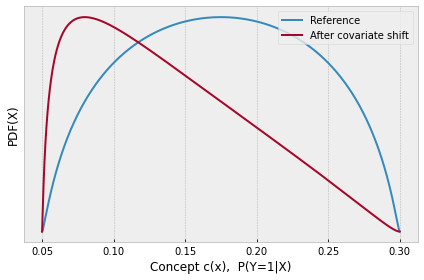

In [67]:
# performance impact

plt.plot(concept, pdf_ref, label = 'Reference')
plt.plot(concept, pdf_ana, label = 'After covariate shift')
plt.xlabel('Concept c(x),  P(Y=1|X)')
plt.ylabel('PDF(X)')
plt.legend(loc='upper right')
plt.yticks([])
plt.tight_layout()
plt.savefig("covariate_shift_effect_on_performance.svg", format='svg')

In [68]:
covariate_effect_integral = np.sum(concept*(pdf_ana-pdf_ref)*(xs[1]-xs[0]))
covariate_effect_integral

-0.06879972733292364

# Concept Drift Example

## Continuous

In [69]:
#data
size = 100_0000
mean_start = 80
shift = 20
ref = np.random.normal(mean_start, 20, size)

def sigmoid(x):
    return 1 / (1 + np.exp((x-mean_start)/10))*0.25+0.05

xs = np.linspace(np.min(ref), np.max(ana), 10_000)
pdf_ref = stats.norm(mean_start, 20).pdf(xs)
concept_ref = sigmoid(xs)
concept_ana = concept_ref*1.4 -0.05*0.8



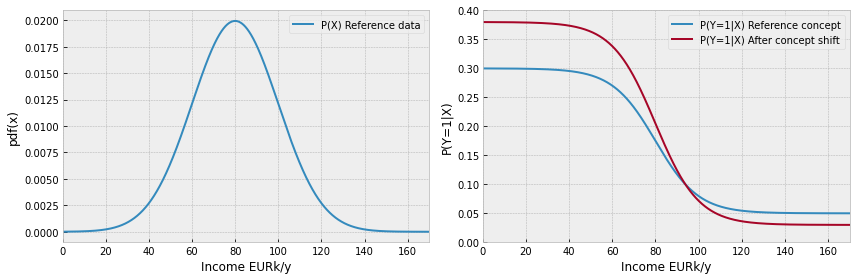

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))


axs[0].plot(xs, pdf_ref, label='P(X) Reference data')
axs[0].set_xlabel('Income EURk/y')
axs[0].set_ylabel('pdf(x)')
axs[0].legend()
axs[0].set_xlim(0, 170 )


axs[1].set_ylabel('P(Y=1|X)')
axs[1].set_xlabel('Income EURk/y')
axs[1].plot(xs, concept_ref, label='P(Y=1|X) Reference concept')
axs[1].plot(xs, concept_ana, label='P(Y=1|X) After concept shift')
axs[1].set_ylim(0,0.4 )
axs[1].set_xlim(0, 170 )
axs[1].legend()
plt.tight_layout()
plt.savefig("concept_pure.svg", format='svg')

In [71]:
concept_diff_abs = abs(concept_ana - concept_ref)
np.sum(concept_diff_abs*(xs[1]-xs[0]))/(xs[-1]-xs[0])

0.042120348238523855

In [72]:
xs

array([-17.56422233, -17.54227559, -17.52032886, ..., 201.83728783,
       201.85923456, 201.8811813 ])

In [73]:
xs_norm = (xs-xs[0])/(xs[-1]-xs[0])

In [74]:
np.sum(concept_diff_abs*(xs_norm[1]-xs_norm[0]))

0.042120348238523855

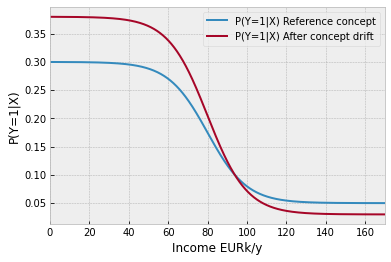

In [75]:
plt.ylabel('P(Y=1|X)')
plt.xlabel('Income EURk/y')
plt.plot(xs, concept_ref, label='P(Y=1|X) Reference concept')
plt.plot(xs, concept_ana, label='P(Y=1|X) After concept drift')
plt.xlim(0, 170 )
plt.legend()
plt.savefig("concept_pure.svg", format='svg')

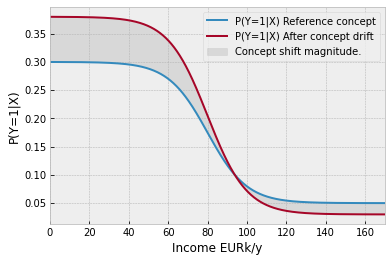

In [76]:
plt.ylabel('P(Y=1|X)')
plt.xlabel('Income EURk/y')
plt.plot(xs, concept_ref, label='P(Y=1|X) Reference concept')
plt.plot(xs, concept_ana, label='P(Y=1|X) After concept drift')
plt.fill_between(xs, concept_ref, concept_ana, color='grey', alpha=0.2, label='Concept shift magnitude.')
plt.xlim(0, 170 )
plt.legend()
plt.savefig("concept_pure_with_fill.svg", format='svg')

In [77]:
concept_magnitude_abs = abs(pdf_ref*(concept_ana-concept_ref))
concept_magnitude = pdf_ref*(concept_ana-concept_ref)

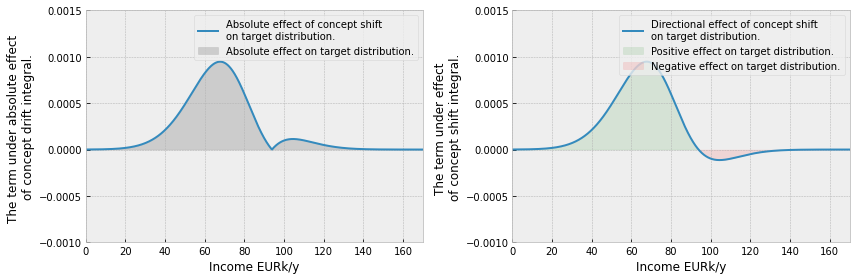

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
abs_covariate_effect = concept*abs(pdf_ana-pdf_ref)
covariate_effect = concept*(pdf_ana-pdf_ref)
axs[0].plot(xs, concept_magnitude_abs, label= 'Absolute effect of concept shift \non target distribution.')
axs[0].set_xlabel('Income EURk/y')
axs[0].fill_between(xs, 0, concept_magnitude_abs, color='grey', alpha=0.3, label='Absolute effect on target distribution.')
axs[0].set_ylabel('The term under absolute effect \nof concept drift integral.')
# axs[0].set_ylabel('pdf(x)')
axs[0].legend(loc='upper right')
axs[0].set_xlim(0, 170 )
axs[0].set_ylim(-0.001, 0.0015 )

axs[1].plot(xs, concept_magnitude, label = 'Directional effect of concept shift \non target distribution.')
axs[1].set_xlabel('Income EURk/y')
axs[1].set_ylabel('The term under effect \nof concept shift integral.')

axs[1].fill_between(xs[concept_magnitude>0], 0, concept_magnitude[concept_magnitude>0], color='green',  alpha=0.1, label='Positive effect on target distribution.')
axs[1].fill_between(xs[concept_magnitude<0], 0, concept_magnitude[concept_magnitude<0], color='red',  alpha=0.1, label='Negative effect on target distribution.')
axs[1].set_xlim(0, 170 )
axs[1].set_ylim(-0.001, 0.0015 )
axs[1].legend(loc='upper right')
plt.tight_layout()
plt.savefig("concept_cont_change_per_x.svg", format='svg')

In [79]:
# directional effect
np.sum(concept_magnitude*(xs[1]-xs[0]))

0.02999995731125803

# Both

In [80]:
size = 100_0000
mean_start = 80
shift = 20
ref = np.random.normal(mean_start, 20, size)

def sigmoid(x):
    return 1 / (1 + np.exp((x-mean_start)/10))*0.25+0.05

xs = np.linspace(np.min(ref), np.max(ana), 10_000)
pdf_ref = stats.norm(mean_start, 20).pdf(xs)
pdf_ana = stats.norm(mean_start + shift, 20).pdf(xs)
concept_ref = sigmoid(xs)
# concept_ana = (concept_ref*1.7)**1.5
concept_ana = (concept_ref*1.8) - 0.05*0.8



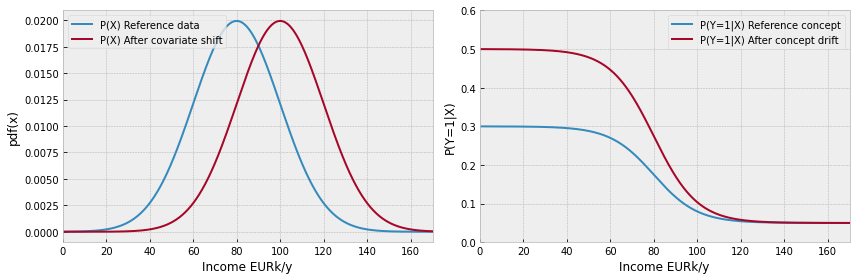

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))


axs[0].plot(xs, pdf_ref, label='P(X) Reference data')
axs[0].plot(xs, pdf_ana, label='P(X) After covariate shift')
axs[0].set_xlabel('Income EURk/y')
axs[0].set_ylabel('pdf(x)')
axs[0].legend()
axs[0].set_xlim(0, 170 )


axs[1].set_ylabel('P(Y=1|X)')
axs[1].set_xlabel('Income EURk/y')
axs[1].plot(xs, concept_ref, label='P(Y=1|X) Reference concept')
axs[1].plot(xs, concept_ana, label='P(Y=1|X) After concept drift')
axs[1].set_ylim(0,0.6 )
axs[1].set_xlim(0, 170 )
axs[1].legend()
plt.tight_layout()
plt.savefig("both.svg", format='svg')

In [82]:
covariate = concept_ref*(pdf_ana - pdf_ref)
covariate_abs = abs(covariate)
covariate_int = np.sum(covariate*(xs[1]-xs[0]))
covariate_abs_int = np.sum(covariate_abs*(xs[1]-xs[0]))
covariate_int, covariate_abs_int

(-0.06879982552887799, 0.1164554435305906)

In [83]:
concept = pdf_ref*(concept_ana - concept_ref)
concept_abs = abs(concept)
concept_int = np.sum(concept*(xs[1]-xs[0]))
concept_abs_int = np.sum(concept_abs*(xs[1]-xs[0]))
concept_int, concept_abs_int

(0.09999983629306787, 0.09999983629306787)

In [84]:

interaction = (concept_ana-concept_ref)*(pdf_ana-pdf_ref)
interaction_abs = abs(interaction)
interaction_int = np.sum(interaction*(xs[1]-xs[0]))
interaction_abs_int = np.sum(interaction_abs*(xs[1]-xs[0]))
interaction_int, interaction_abs_int

(-0.05503988606092919, 0.06253039966811728)

In [85]:
full = concept_ana*pdf_ana - concept_ref*pdf_ref
full_abs = abs(full)
full_int = np.sum(full*(xs[1]-xs[0]))
full_abs_int = np.sum(full_abs*(xs[1]-xs[0]))
full_int, full_abs_int

(-0.023839875296739324, 0.10380666864122581)

In [86]:
interaction_int+concept_int+covariate_int

-0.02383987529673931

In [87]:
interaction_abs_int,concept_abs_int,covariate_abs_int

(0.06253039966811728, 0.09999983629306787, 0.1164554435305906)

In [88]:
interaction_abs_int+concept_abs_int+covariate_abs_int

0.2789856794917758

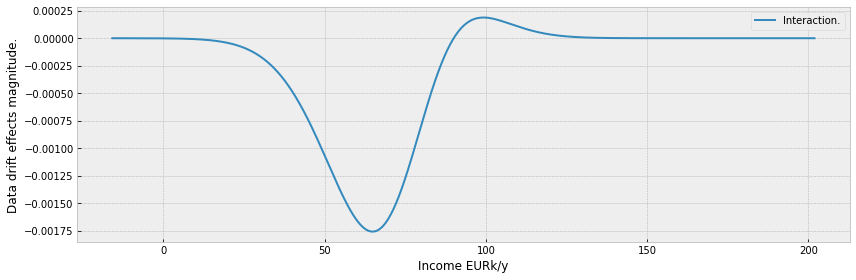

In [89]:
plt.figure(figsize=(12,4))
plt.plot(xs, interaction, label='Interaction.')
plt.xlabel('Income EURk/y')
plt.ylabel('Data drift effects magnitude.')
plt.legend()
plt.tight_layout()
plt.savefig('interaction.svg', format='svg')

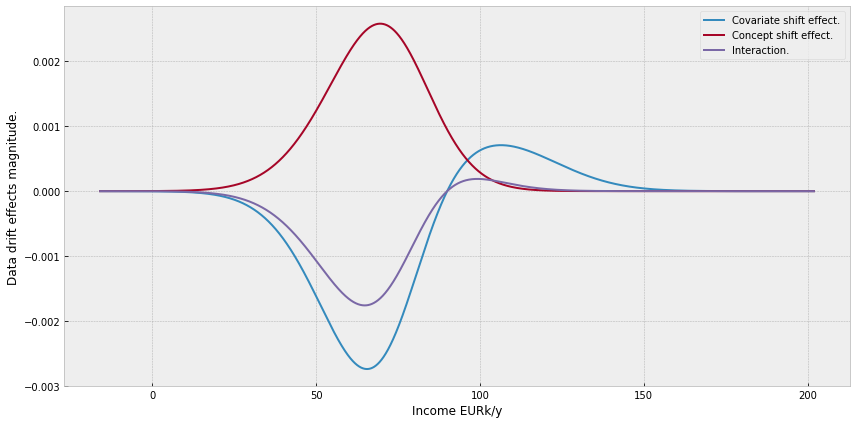

In [90]:
plt.figure(figsize=(12,6))
plt.plot(xs, covariate, label='Covariate shift effect.')
plt.plot(xs, concept, label='Concept shift effect.')
plt.plot(xs, interaction, label='Interaction.')
plt.xlabel('Income EURk/y')
plt.ylabel('Data drift effects magnitude.')
plt.legend()
plt.tight_layout()
plt.savefig('interaction_concept_cov.svg', format='svg')

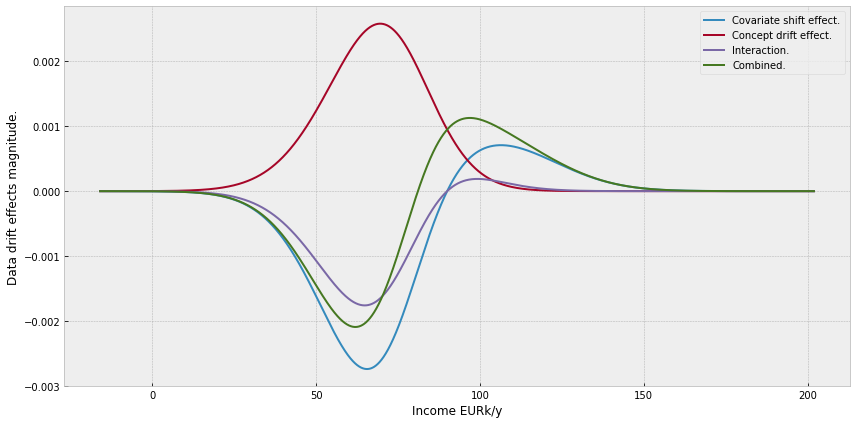

In [91]:
plt.figure(figsize=(12,6))
plt.plot(xs, covariate, label='Covariate shift effect.')
plt.plot(xs, concept, label='Concept drift effect.')
plt.plot(xs, interaction, label='Interaction.')
plt.plot(xs, full, label='Combined.')
plt.xlabel('Income EURk/y')
plt.ylabel('Data drift effects magnitude.')
plt.legend()
plt.tight_layout()
plt.savefig('all_in.svg', format='svg')

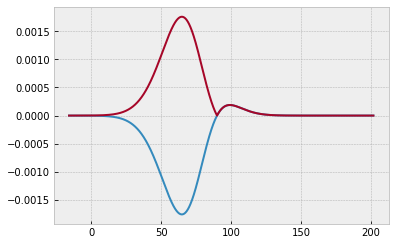

In [92]:
plt.plot(xs, interaction)
plt.plot(xs, interaction_abs)